In [1]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

porter = nltk.PorterStemmer()

% matplotlib inline
sns.set(style="white", color_codes=True)
stop = stopwords.words('english')
dir = 'C:\\Users\\Travis Park\\Google Drive\\UN\\Team MOZART RAP\\'

In [2]:
tfidfvectorizer =TfidfVectorizer(ngram_range = (1,2),sublinear_tf=False, 
                                 min_df = 0.01, max_features = 1100) 
def TFIDFtotable(inputlist1, inputlist2, newcollist):
    corpus = inputlist1 + inputlist2
    
    x = tfidfvectorizer.fit_transform(corpus)
    x = pd.DataFrame((x * x.T).A)
    
    x = x.ix[:len(inputlist1)-1,len(inputlist1):]
    x.columns = newcollist
    x['Text'] = trimtext
    x = pd.merge(x, Paragraph_DF, how = 'left', left_on = 'Text', right_on = 'StemText')
    x=x.drop(['Text_x','Text_y','TrimText','StemText'],1)
    x=pd.melt(x, id_vars=['Number'])
    x.rename(columns={'Number':'Paragraph','variable': 'Target','value':'T_Cosine'}, inplace = True)
    TFIDFTable = x    
   
    return TFIDFTable

In [3]:
def RemoveVerbs(string):
    if len(string) > 0:
        x = nltk.pos_tag(string.split(' '))
        x = [(word, tag) for (word, tag) in x
             if tag.startswith('N') 
             or tag.startswith('J')
             or tag.startswith('R')]
        x = ' '.join([i[0] for i in x])
        return x
    else:
        return 'x x'

In [4]:
SDG_Targets = pd.read_excel(dir +'SDG_Goals.xlsx', names = ['ID', 'Goal','OrigionalText','GoalText'],sheetname = 'Sheet1')
SDG_Targets['TrimGoal'] = ''

targtext = []
x=0

while x < len(SDG_Targets):
    y = SDG_Targets['GoalText'][x].lower().replace('-',' ').split(' ')
    y = [z for z in y if z.isalpha() if z not in stop]
    targtext.append(' '.join(y))
    x=x+1
    
SDG_Targets['TrimGoal'] = targtext
SDG_Targets['ID'] = SDG_Targets['ID'].astype(int)
SDG_Targets.head(1)

,ID,Goal,OrigionalText,GoalText,TrimGoal
0,1,Poverty,Poverty End poverty in all its forms everywhere,poverty forms eveywhere,poverty forms eveywhere


In [5]:
test = list(SDG_Targets['TrimGoal'])

In [6]:
f = open(dir + 'Bhutan_Doc_test.txt', 'r')
f = f.read().replace('. \n\n','.\n\n').replace('-',' ').replace('\x0c',' ').replace('...','').replace('Eleventh Five Year Plan',' ').split('.\n\n')
f = [w.replace('\n',' ') for w in f]

w=0
wlist=[]
while w<len(f):
    wlist.append(w)
    w=w+1

In [7]:
Paragraph_DF = pd.DataFrame(columns = ['Number','Text', 'TrimText'])
Paragraph_DF['Number'] = wlist
Paragraph_DF['Text'] = f

In [8]:
ttext = []
x = 0 
while x < len(Paragraph_DF):
    y = Paragraph_DF['Text'][x].lower().split(' ')
    y = [z for z in y if z.isalpha() if z not in stop]
    y = RemoveVerbs(' '.join(y))
    ttext.append(y)
    x=x+1
    
Paragraph_DF['TrimText'] = ttext

In [9]:
stemtext = []
x = 0
while x<len(Paragraph_DF):
    y = Paragraph_DF['TrimText'][x].split(' ')
    y = ' '.join([porter.stem(z) for z in y])
    stemtext.append(y)
    x=x+1
    
Paragraph_DF['StemText'] = stemtext

In [10]:
Paragraph_DF.head(1)

,Number,Text,TrimText,StemText
0,0,Main Document Volume I 1 ELEVENTH FIVE ...,main document volume eleventh year plan june m...,main document volum eleventh year plan june ma...


In [11]:
alldocs = ttext+targtext

In [12]:
stuff = "ngram_range = (1,2),sublinear_tf=False, min_df = 0.01, max_features = 1100"
tfidfvectorizer =TfidfVectorizer(ngram_range = (1,2),sublinear_tf=False, 
                                 min_df = 0.01, max_features = 1100) 

x = tfidfvectorizer.fit_transform(alldocs)
y = pd.DataFrame((x * x.T).A)

z = y.ix[:len(ttext)-1,len(ttext):]
z.columns = list(SDG_Targets['ID'])

z1=z.unstack().reset_index()
z1.columns = ['Goal','Paragraph','CosineSimilarity']
z2 = z1[(z1['Goal'] != z1['Paragraph']) & (z1['CosineSimilarity'] > 0)]

z2.sort_values(by = 'CosineSimilarity', ascending = False).head()

avg = z2['CosineSimilarity'].mean()
avg

0.07972566180440664

In [18]:
x1 = pd.DataFrame(x)

PandasError: DataFrame constructor not properly called!

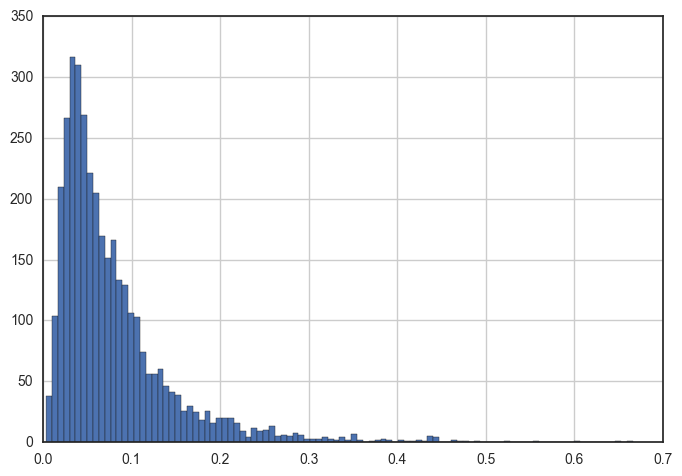

In [13]:
z2['CosineSimilarity'].hist(bins = 100);

In [22]:
kmeans = KMeans(n_clusters = 17, random_state = 0,init='k-means++',max_iter = 100)

kmeans_pred = kmeans.fit(x)

clust = kmeans.predict(x)
y['Clust'] = clust

In [23]:
kmeans.score

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=17, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)>

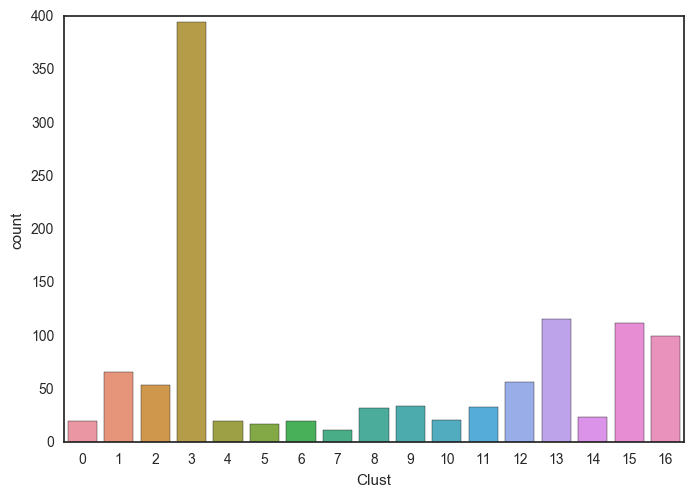

In [24]:
sns.countplot(x="Clust", data=y)

In [17]:
y.to_csv(dir + 'cluster.csv')

In [18]:
z2.sort(['CosineSimilarity'], ascending = False).head(1)

C:\Users\Travis Park\Anaconda3_1\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Goal,Paragraph,CosineSimilarity
13496,13,116,0.666021


In [19]:
z3 = pd.pivot_table(z2, values = 'CosineSimilarity',index = 'Paragraph', aggfunc = 'max').reset_index()

z4 = pd.merge(z3, z2, how = 'left', left_on = ['Paragraph','CosineSimilarity'], right_on = ['Paragraph','CosineSimilarity'])
z4 = pd.merge(z4, Paragraph_DF, how = 'left', left_on = 'Paragraph', right_on = 'Number')
z4 = pd.merge(z4, SDG_Targets, how = 'left', left_on = 'Goal', right_on = 'ID')
z4 = z4.drop(['Number','ID','Goal_y'],1)
z4.rename(columns={'Goal_x': 'Goal'}, inplace = True)
z4 = z4[(z4['TrimText'].str.len() > 100)]

In [20]:
z4.to_csv(dir + 'rebuild.csv')

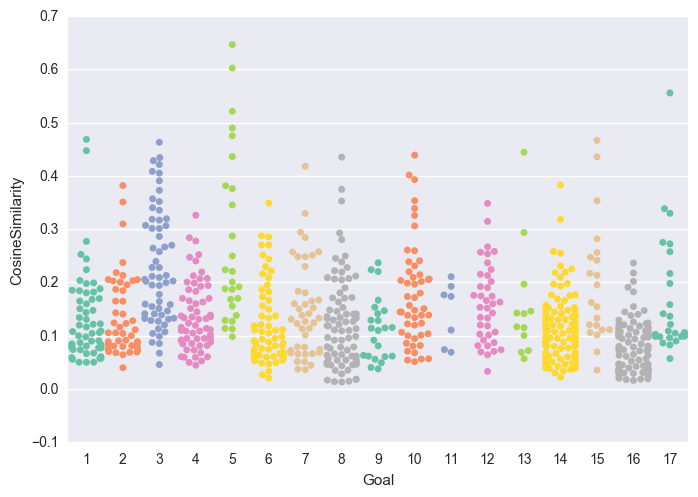

In [31]:
sns.set(style="darkgrid", color_codes=True)
plt = sns.swarmplot(x="Goal", y="CosineSimilarity", data=z4, size = 5, edgecolor = 'w', palette = 'Set2');

In [28]:
SubTargets = pd.read_excel(dir +'SDG_test.xlsx', names = ['ID','GoalID','Target'],sheetname = 'Sheet2')
SubTargets['TrimTarget'] = ''
SubTargets['StemTarget'] = ''
SubTargets['ID'] = SubTargets['ID'].astype(float)

In [29]:
stargtext = []
x=0

while x < len(SubTargets):
    y = SubTargets['Target'][x].lower().replace('-',' ').split(' ')
    y = [z for z in y if z.isalpha() if z not in stop]
    y = RemoveVerbs(' '.join(y))
    stargtext.append(y)
    x=x+1
    
SubTargets['TrimTarget'] = stargtext

In [30]:
stemstargtext = []
x=0

while x < len(SubTargets):
    y = SubTargets['TrimTarget'][x].split(' ')
    y = ' '.join([porter.stem(z) for z in y])
    stemstargtext.append(y)
    x=x+1
    
SubTargets['StemTarget'] = stemstargtext

In [31]:
subtargets = list(SDG_Targets['ID'])
SubGoal_Match =pd.DataFrame(columns = ['Goal','Target','Paragraph','T_Cosine'])
goal = list(SDG_Targets['ID'])

y = 1
                                       
while y < len(subtargets)+1:
    z5 = z4[(z4['Goal'] == goal[y-1])]
    SubTargets1 = SubTargets[(SubTargets['GoalID'] == y)]
    trimtext = list(z5['StemText'])
    trimstarget = list(SubTargets1['StemTarget'])
    newcolumns = list(SubTargets1['ID'])
    
    t = TFIDFtotable(trimtext, trimstarget, newcolumns)
    t['Goal'] = y
    
    frames = [SubGoal_Match, t]
    SubGoal_Match = pd.concat(frames)
    y=y+1

In [32]:
SubTargets.head()

,ID,GoalID,Target,TrimTarget,StemTarget
0,1.1,1,"By 2030, eradicate extreme poverty for all peo...",eradicate extreme poverty people currently peo...,erad extrem poverti peopl current peopl less
1,1.2,1,"By 2030, reduce at least by half the proportio...",least half proportion women children ages pove...,least half proport women children age poverti ...
2,1.3,1,Implement nationally appropriate social protec...,implement nationally appropriate social protec...,implement nation appropri social protect syste...
3,1.4,1,"By 2030, ensure that all men and women, in par...",men particular poor equal rights economic well...,men particular poor equal right econom well ac...
4,1.5,1,"By 2030, build the resilience of the poor and ...",resilience poor vulnerable situations exposure...,resili poor vulner situat exposur vulner clima...


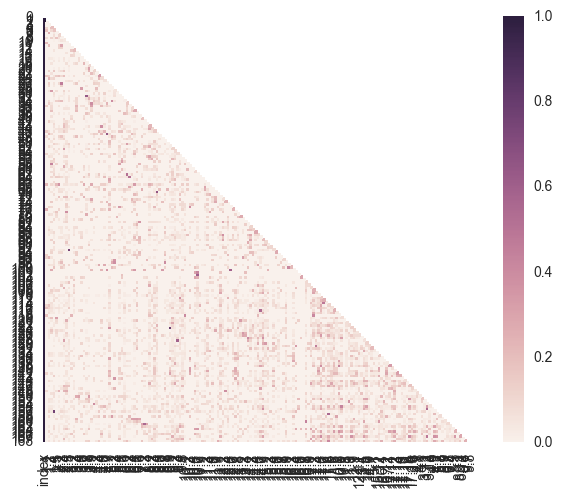

In [53]:
test = list(SubTargets['StemTarget'])
lab = list(SubTargets['ID'])
x = tfidfvectorizer.fit_transform(test)
y = pd.DataFrame((x * x.T).A)
y.columns = lab
y.index = lab
y = y.reset_index()

mask = np.zeros_like(y)
mask[np.triu_indices_from(mask)] = True
#fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (3,3))
sns.heatmap(y, square = True,mask = mask, vmax=1, vmin= 0,yticklabels=True);
#plt.title('Goal')
#plt.xlabel('Target')
#plt.ylabel('Target')

In [60]:
my = pd.melt(y,'index',var_name="target")
my.to_csv(dir + 'targetsim.csv')

In [21]:
SubGoal_Max = pd.pivot_table(SubGoal_Match, values = 'T_Cosine',columns = 'Paragraph', aggfunc = 'max').reset_index()
SubGoal_Max = pd.merge(SubGoal_Max, SubGoal_Match, how = 'left', left_on = ['Paragraph','T_Cosine'], right_on = ['Paragraph','T_Cosine'])

SubGoal_Max = SubGoal_Max[(SubGoal_Max['T_Cosine'] > 0)] 
SubGoal_Max = pd.merge(SubGoal_Max, Paragraph_DF, how = 'left', left_on = 'Paragraph', right_on = 'Number')
SubGoal_Max = pd.merge(SubGoal_Max, SubTargets, how = 'left', left_on = 'Target', right_on = 'ID')
SubGoal_Max = SubGoal_Max.drop(['Number','GoalID','ID'],1)
SubGoal_Max.rename(columns={'Target_x': 'Target',
                              'Text':'PText',
                              'TrimText':'PTrimText',
                              'Target_y':'TargetText'}, inplace = True)
SubGoal_Max['Target'] = SubGoal_Max['Target'].astype(float)
SubGoal_Max['Goal'] = SubGoal_Max['Goal'].astype(str)

In [22]:
SubGoal_Max.to_csv(dir + 'target_assign.csv')

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline
sns.set(style="white", color_codes=True)

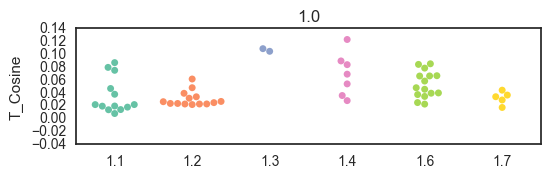

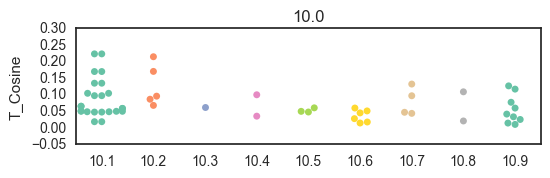

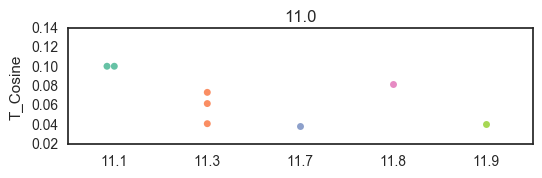

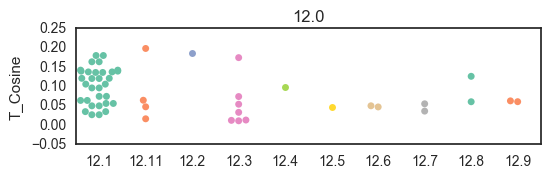

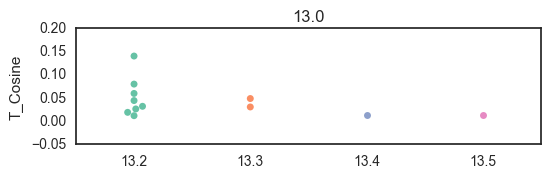

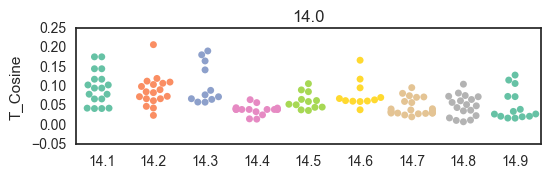

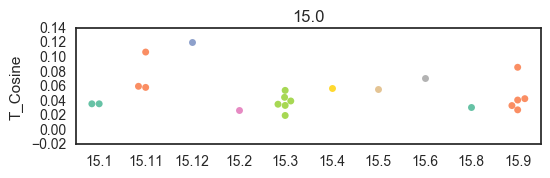

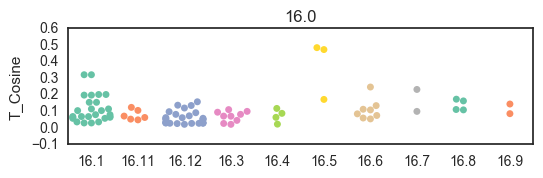

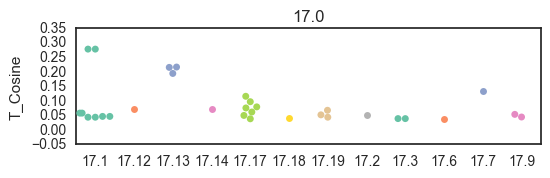

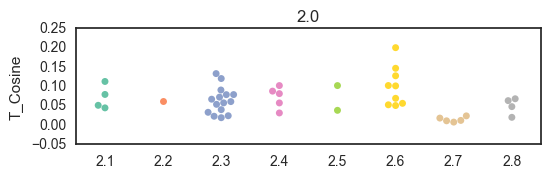

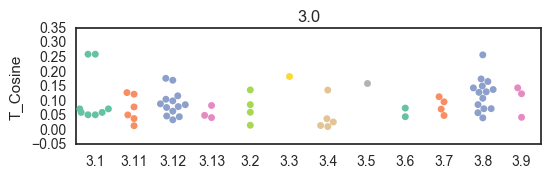

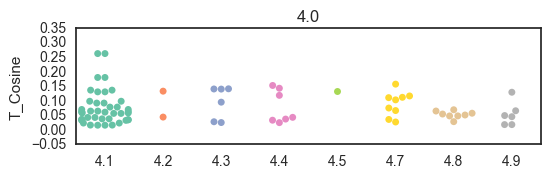

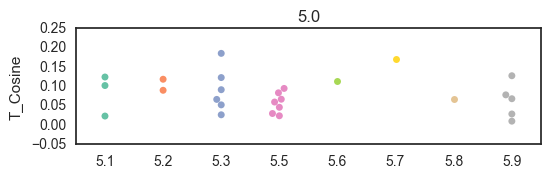

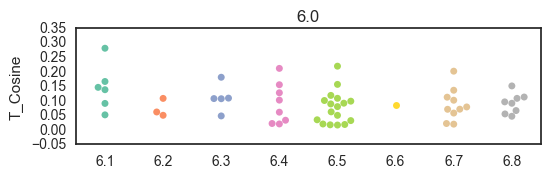

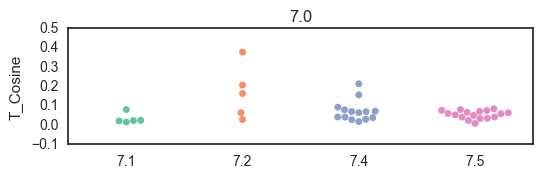

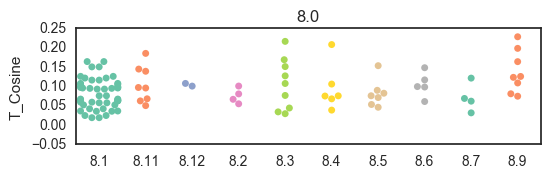

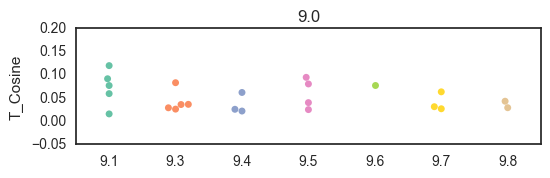

In [24]:
x = sorted(list(SubGoal_Max['Goal'].unique()))
y = list(SubGoal_Max['Target'].unique())
y = sorted([int(z) for z in y])

for i in x:
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6,1.5))
    sns.swarmplot(ax = ax, y = 'T_Cosine' , x = 'Target', palette = 'Set2', 
                data = SubGoal_Max[(SubGoal_Max['Goal'] == i)], size = 5, edgecolor = 'w')
    plt.title(i)
    plt.xlabel('')

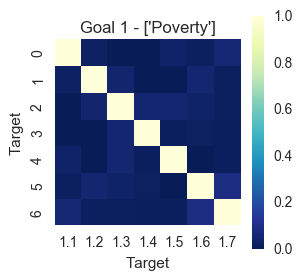

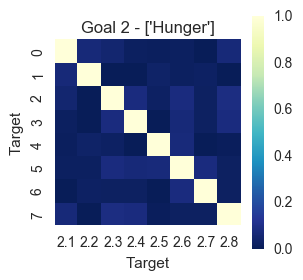

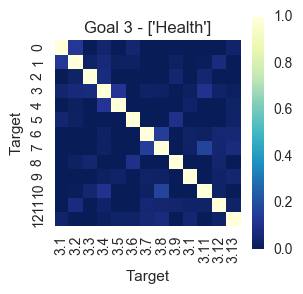

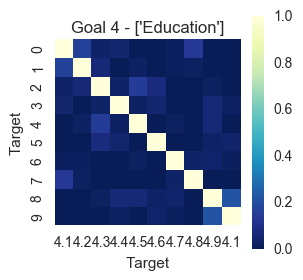

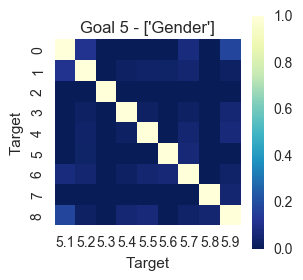

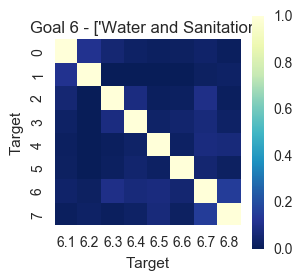

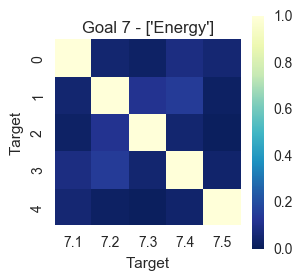

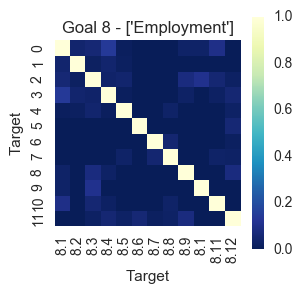

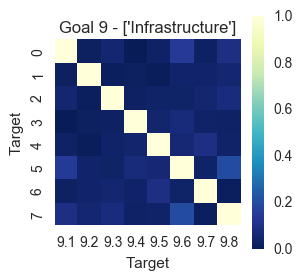

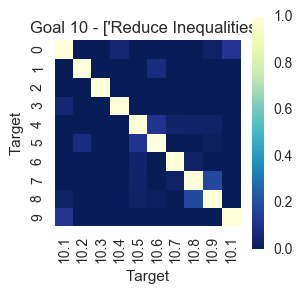

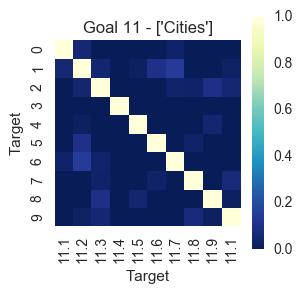

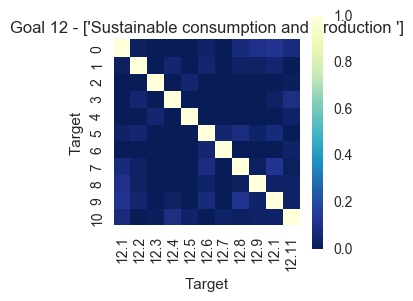

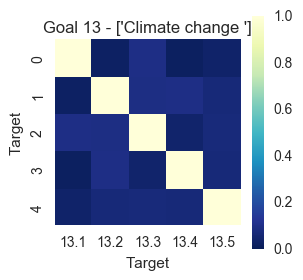

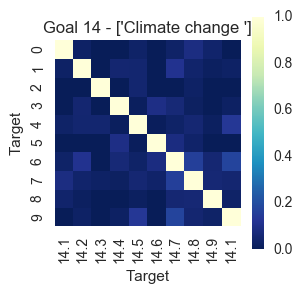

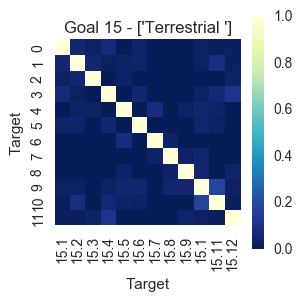

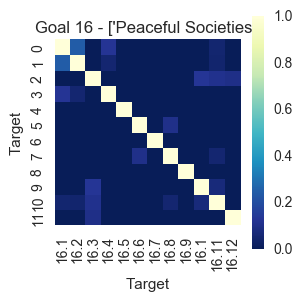

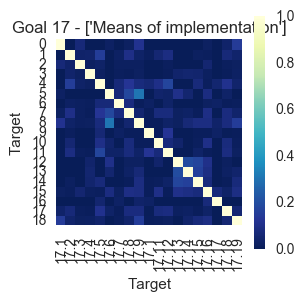

In [25]:
Sub2 = pd.merge(SubTargets,SDG_Targets, how = 'left', left_on = 'GoalID',right_on = 'ID' )

z = sorted(list(Sub2['GoalID'].unique()))

for i in z:
    trimstarget = list(Sub2['StemTarget'][(SubTargets['GoalID'] == i)])
    targlist = list(Sub2['ID_x'][(SubTargets['GoalID'] == i)])
    name  = str(Sub2['Goal'][(Sub2['ID_y'] == i)].unique())
    x = tfidfvectorizer.fit_transform(trimstarget)
    y = pd.DataFrame((x * x.T).A)
    y.columns =targlist
    mask = np.zeros_like(y)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (3,3))
    sns.heatmap(y, square = True,vmax=1, vmin= 0, cmap = 'YlGnBu_r',yticklabels=True)
    plt.title('Goal ' +str(i) + ' - ' + str(name))
    plt.xlabel('Target')
    plt.ylabel('Target')